<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data_multi_delta_(1_6)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.6_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,39.543895,27.146580,50.777992,49.449164,17.133675,194.051305,175.400472,18.650833
1,0.0,1.0,38.637560,97.280709,65.673756,98.347037,-27.656349,282.282714,306.973438,-24.690724
2,0.0,2.0,43.926410,93.285143,60.377118,74.171046,-5.038406,276.721312,278.006616,-1.285303
3,0.0,3.0,53.659873,57.729329,21.217383,23.965483,24.397525,190.969594,162.857854,28.111739
4,0.0,4.0,69.086778,36.462122,89.991742,37.263513,7.388792,250.192948,238.286225,11.906724
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,33.289232,59.620007,34.405060,71.612883,-19.743664,189.183518,213.116082,-23.932565
249996,999.0,246.0,49.792545,34.122474,74.807325,80.056868,-6.728010,242.051202,247.318998,-5.267797
249997,999.0,247.0,98.321861,58.097340,95.443636,68.055520,-42.992168,286.926189,322.737211,-35.811022
249998,999.0,248.0,37.424259,84.988545,95.130651,64.406514,24.503795,316.453765,290.504496,25.949269


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    39.543895  27.146580  50.777992  49.449164  17.133675   
      1.0    38.637560  97.280709  65.673756  98.347037 -27.656349   
      2.0    43.926410  93.285143  60.377118  74.171046  -5.038406   
      3.0    53.659873  57.729329  21.217383  23.965483  24.397525   
      4.0    69.086778  36.462122  89.991742  37.263513   7.388792   
...                ...        ...        ...        ...        ...   
999.0 245.0  33.289232  59.620007  34.405060  71.612883 -19.743664   
      246.0  49.792545  34.122474  74.807325  80.056868  -6.728010   
      247.0  98.321861  58.097340  95.443636  68.055520 -42.992168   
      248.0  37.424259  84.988545  95.130651  64.406514  24.503795   
      249.0  80.582547  26.769722  58.265600  43.172208 -11.374026   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    194.051305  175.400472  18.650833  
      1.0    282.282714  306.973438 -24.690724  
      2.0    276.721312  278.006616  -1.285303  
      3.0    190.969594  162.857854  28.111739  
      4.0    250.192948  238.286225  11.906724  
...                 ...         ...        ...  
999.0 245.0  189.183518  213.116082 -23.932565  
      246.0  242.051202  247.318998  -5.267797  
      247.0  286.926189  322.737211 -35.811022  
      248.0  316.453765  290.504496  25.949269  
      249.0  207.416050  218.615160 -11.199110  

[250000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    39.543895  27.146580  50.777992  49.449164  17.133675   
      1.0    38.637560  97.280709  65.673756  98.347037 -27.656349   
      2.0    43.926410  93.285143  60.377118  74.171046  -5.038406   
      3.0    53.659873  57.729329  21.217383  23.965483  24.397525   
      4.0    69.086778  36.462122  89.991742  37.263513   7.388792   
...                ...        ...        ...        ...        ...   
999.0 245.0  33.289232  59.620007  34.405060  71.612883 -19.743664   
      246.0  49.792545  34.122474  74.807325  80.056868  -6.728010   
      247.0  98.321861  58.097340  95.443636  68.055520 -42.992168   
      248.0  37.424259  84.988545  95.130651  64.406514  24.503795   
      249.0  80.582547  26.769722  58.265600  43.172208 -11.374026   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    194.051305  175.400472  18.650833  
      1.0    282.282714  306.973438 -24.690724  
      2.0    276.721312  278.006616  -1.285303  
      3.0    190.969594  162.857854  28.111739  
      4.0    250.192948  238.286225  11.906724  
...                 ...         ...        ...  
999.0 245.0  189.183518  213.116082 -23.932565  
      246.0  242.051202  247.318998  -5.267797  
      247.0  286.926189  322.737211 -35.811022  
      248.0  316.453765  290.504496  25.949269  
      249.0  207.416050  218.615160 -11.199110  

[250000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,39.543895,27.146580,50.777992,49.449164,17.133675,194.051305,175.400472,18.650833
1,0.0,1.0,38.637560,97.280709,65.673756,98.347037,-27.656349,282.282714,306.973438,-24.690724
2,0.0,2.0,43.926410,93.285143,60.377118,74.171046,-5.038406,276.721312,278.006616,-1.285303
3,0.0,3.0,53.659873,57.729329,21.217383,23.965483,24.397525,190.969594,162.857854,28.111739
4,0.0,4.0,69.086778,36.462122,89.991742,37.263513,7.388792,250.192948,238.286225,11.906724
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,33.289232,59.620007,34.405060,71.612883,-19.743664,189.183518,213.116082,-23.932565
249996,999.0,246.0,49.792545,34.122474,74.807325,80.056868,-6.728010,242.051202,247.318998,-5.267797
249997,999.0,247.0,98.321861,58.097340,95.443636,68.055520,-42.992168,286.926189,322.737211,-35.811022
249998,999.0,248.0,37.424259,84.988545,95.130651,64.406514,24.503795,316.453765,290.504496,25.949269


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    39.543895  27.146580  50.777992  49.449164  17.133675   
      1.0    38.637560  97.280709  65.673756  98.347037 -27.656349   
      2.0    43.926410  93.285143  60.377118  74.171046  -5.038406   
      3.0    53.659873  57.729329  21.217383  23.965483  24.397525   
      4.0    69.086778  36.462122  89.991742  37.263513   7.388792   
...                ...        ...        ...        ...        ...   
999.0 245.0  33.289232  59.620007  34.405060  71.612883 -19.743664   
      246.0  49.792545  34.122474  74.807325  80.056868  -6.728010   
      247.0  98.321861  58.097340  95.443636  68.055520 -42.992168   
      248.0  37.424259  84.988545  95.130651  64.406514  24.503795   
      249.0  80.582547  26.769722  58.265600  43.172208 -11.374026   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    194.051305  175.400472  18.650833  
      1.0    282.282714  306.973438 -24.690724  
      2.0    276.721312  278.006616  -1.285303  
      3.0    190.969594  162.857854  28.111739  
      4.0    250.192948  238.286225  11.906724  
...                 ...         ...        ...  
999.0 245.0  189.183518  213.116082 -23.932565  
      246.0  242.051202  247.318998  -5.267797  
      247.0  286.926189  322.737211 -35.811022  
      248.0  316.453765  290.504496  25.949269  
      249.0  207.416050  218.615160 -11.199110  

[250000 rows x 8 columns]

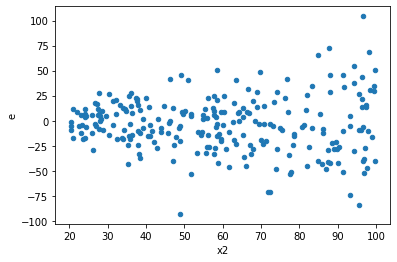

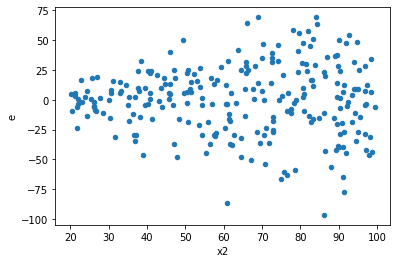

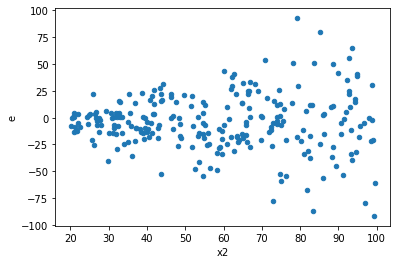

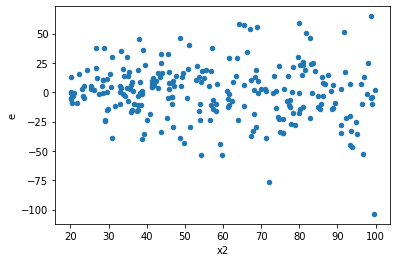

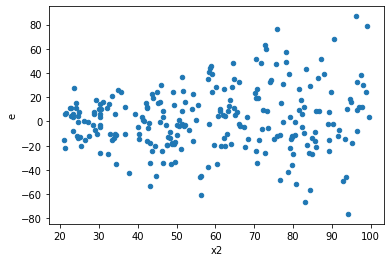

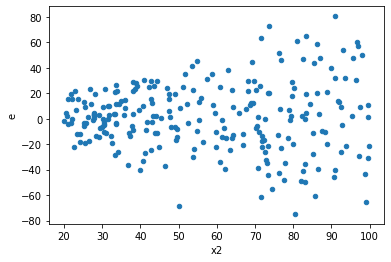

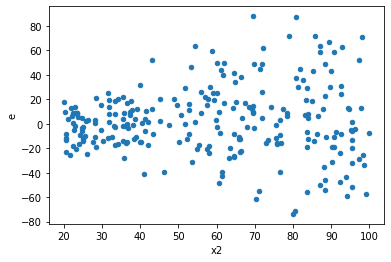

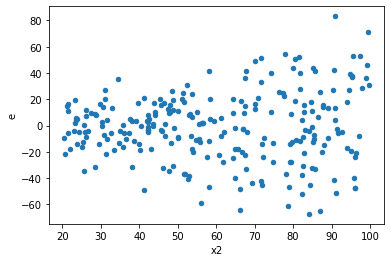

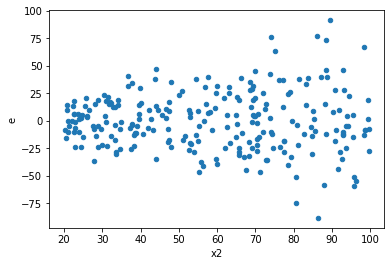

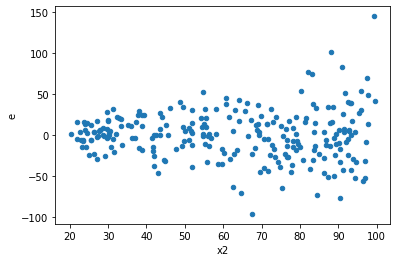

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[['x1', 'x2', 'x3', 'x4']]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,126.0,116.0,83650.88770882101,97376.15324875484,663.8959341969921,839.4495969720244,1.2644294892201309,0.20033057216200767,0.8998347139189962,0.10016528608100383,Reject005=1 : Homoscedasticity
1.0,122.0,120.0,80987.8939576502,120814.02671197349,663.835196374182,1006.7835559331124,1.5166167166671616,0.022852681279090126,0.9885736593604549,0.011426340639545063,Reject005=0 : Heteroscedasticity
2.0,105.0,137.0,69093.64368045295,97478.7707659102,658.0347017185995,711.5238742037241,1.0812862488033321,0.6643275841005454,0.6678362079497273,0.3321637920502727,Reject005=1 : Homoscedasticity
4.0,108.0,134.0,64644.097279687136,96237.46885998889,598.5564562933994,718.19006611932,1.1998702187037789,0.31565358431226764,0.8421732078438662,0.15782679215613382,Reject005=1 : Homoscedasticity
8.0,125.0,117.0,81679.22467647494,80610.76749579866,653.4337974117996,688.9809187675099,1.0544004939697178,0.7729803163776465,0.6135098418111767,0.38649015818882326,Reject005=1 : Homoscedasticity
11.0,131.0,111.0,62493.98929600753,145878.50626893167,477.0533534046376,1314.2207771975825,2.7548716884982416,8.507885751463107e-08,0.9999999574605712,4.2539428757315534e-08,Reject005=0 : Heteroscedasticity
12.0,117.0,125.0,46458.58628110131,122663.88950471871,397.0819340265069,981.3111160377497,2.4713063777216395,9.211860243496517e-07,0.9999995394069878,4.6059301217482584e-07,Reject005=0 : Heteroscedasticity
19.0,126.0,116.0,78234.64455434201,78288.5243337424,620.9098774154128,674.9010718426069,1.0869549614058918,0.649529997045015,0.6752350014774925,0.3247649985225075,Reject005=1 : Homoscedasticity
21.0,112.0,130.0,31650.420163075283,120058.21685963831,282.59303717031503,923.5247450741408,3.268037862226396,1.5689183285871877e-10,0.9999999999215541,7.844591642935939e-11,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,126.0,116.0,83650.88770882101,97376.15324875484,663.8959341969921,839.4495969720244,1.2644294892201309,0.20033057216200767,Reject005=1 : Homoscedasticity
1.0,122.0,120.0,80987.8939576502,120814.02671197349,663.835196374182,1006.7835559331124,1.5166167166671616,0.022852681279090126,Reject005=0 : Heteroscedasticity
2.0,105.0,137.0,69093.64368045295,97478.7707659102,658.0347017185995,711.5238742037241,1.0812862488033321,0.6643275841005454,Reject005=1 : Homoscedasticity
3.0,110.0,132.0,69739.66035239086,59431.82142043859,633.9969122944623,450.241071366959,0.7101628771937027,0.06414473455825602,Reject005=1 : Homoscedasticity
4.0,108.0,134.0,64644.097279687136,96237.46885998889,598.5564562933994,718.19006611932,1.1998702187037789,0.31565358431226764,Reject005=1 : Homoscedasticity
5.0,116.0,126.0,128028.81689535671,42834.74908103247,1103.6966973737647,339.95832603994023,0.30801788829201693,4.494114659248067e-10,Reject005=0 : Heteroscedasticity
6.0,108.0,134.0,89131.13340838774,95636.14375448304,825.2882722998866,713.702565331963,0.8647918421802359,0.4331922803991965,Reject005=1 : Homoscedasticity
7.0,116.0,126.0,84247.03403610518,76094.09917366627,726.2675347940102,603.9214220132244,0.831541261423056,0.3138643517670825,Reject005=1 : Homoscedasticity
8.0,125.0,117.0,81679.22467647494,80610.76749579866,653.4337974117996,688.9809187675099,1.0544004939697178,0.7729803163776465,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      562
Reject005=0 : Heteroscedasticity    438
Name: Result_test, dtype: int64